Optimization terminated successfully.
         Current function value: 393.490326
         Iterations: 36
         Function evaluations: 70
Compared to Figure 6 our data follow thhe same trend bud is shifted somewhat lower on the mu axis
The Theorecticals for the omega = .23,1 models fit a similar curve but seem to deviate to higher and lower mu values. 
This may imply a change in slope trend for sufficient sample size


The point of collecting data and plotting the collected values is usually to try to find a formula that can be used to model a (presumed) relationship.
There are many methods based on assume formula relations.  I just used an existing python optimization function based on a chi squared relationship.
The optimized omega and h are: 0.318217 and 0.630523 respectively
We get a chi squared fuction of 393.490326 with an avereage error of +- 0.257397 per point
I used a goodness of fit test and degrees of freedom of 290 resulting in +- 1. 
100% error is reasonable for some rou

TypeError: len() of unsized object

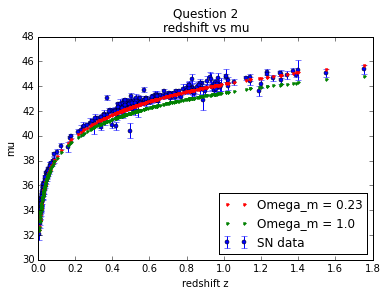

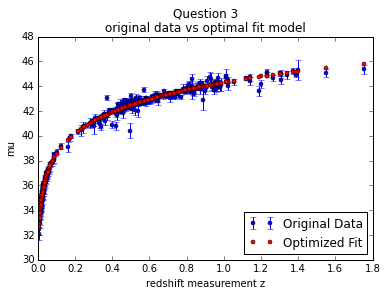

In [3]:
#Physics 154 Assignment 7; Cameron R. Ha
#libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import quad
from scipy.optimize  import fmin
import emcee


%matplotlib inline

#Global variables
c = 3E8
omega_m1 = 0.23
omega_m2 = 1.0
h = 0.7
i = 0
j = 0
g = 0

#Question 1 is just information


#Code section
z,mu,sig = np.loadtxt(open("SN.dat"), skiprows = 0, usecols = (1,2,3), unpack = True)
mu_up = mu + sig
mu_down = mu - sig
data = (z,mu,sig)


#functions
def E(z,Omega_m):
    ars = np.sqrt(Omega_m*((1+z)**3)+(1-Omega_m))
    return 1/ars

def Dl(z,D_c):
    Dist = (1+z)*D_c 
    return Dist

def MU_sp(dl,h):
    return 25 - 5*np.log10(h) + 5*np.log10(dl)

def MU(param,z):
    omega,h = param 
    Dcc = []
    for g in range(len(z)):
        Dcc = np.append(Dcc, 3000*quad(E, 0, z[g], args = (omega))[0])
    Dls = (1+z)*Dcc
    Mew = 25 - 5*np.log10(h) + 5*np.log10(Dls)
    return Mew

def chi2(param):
    omega,h = param
    chi = (mu-MU(param,z))**2/sig**2
    chi_sum = np.sum(chi)
    return chi_sum

Dc2 = []
Dc1 = []
for i in range(len(z)):
    Dc1 = np.append(Dc1, 3000*quad(E, 0, z[i], args = (omega_m1))[0])
    Dc2 = np.append(Dc2, 3000*quad(E, 0, z[i], args = (omega_m2))[0])


dl1 = (1+z)*Dc1
dl2 = (1+z)*Dc2

MU1 = MU_sp(dl1, 0.7)
MU2 = MU_sp(dl2, 0.7)

omega_opt,h_opt = fmin(chi2,np.array([0.2,0.7]))

param_opt = omega_opt, h_opt
x_sqr = chi2(param_opt)
errchi = np.sum(sig)/len(sig)

#plotting for q2
plt.figure()
plt.errorbar(z, mu, yerr=sig, fmt='bo', markersize = 4, label="SN data")
plt.plot(z,MU1,'r.',label="Omega_m = 0.23")
plt.plot(z,MU2,'g.',label="Omega_m = 1.0")
plt.xlabel('redshift z')
plt.ylabel('mu')
plt.legend(loc=4)
plt.title('Question 2 \nredshift vs mu')
#plt.plot(z,Dl,'-r')

plt.show

#Question 2 print
print "Compared to Figure 6 our data follow thhe same trend bud is shifted somewhat lower on the mu axis"
print "The Theorecticals for the omega = .23,1 models fit a similar curve but seem to deviate to higher and lower mu values. \nThis may imply a change in slope trend for sufficient sample size"
print "\n"
#Qustion 3 plot
plt.figure()
plt.errorbar(z, mu, yerr = sig, fmt ='o', markersize = 4, label = "Original Data")
plt.errorbar(z, MU(param_opt,z), fmt="ro", markersize=4, label = "Optimized Fit")
plt.xlabel('redshift measurement z')
plt.ylabel('mu')
plt.legend(loc=4)
plt.title('Question 3 \noriginal data vs optimal fit model')

#Question 3 print
print "The point of collecting data and plotting the collected values is usually to try to find a formula that can be used to model a (presumed) relationship.\nThere are many methods based on assume formula relations.  I just used an existing python optimization function based on a chi squared relationship."
print "The optimized omega and h are: %f and %f respectively" % (omega_opt,h_opt)
print "We get a chi squared fuction of %f with an avereage error of +- %f per point" % (x_sqr,errchi)
print "I used a goodness of fit test and degrees of freedom of 290 resulting in +- 1. \n100% error is reasonable for some rough Astrological models but not as accurate as we want."
print "\n"
#print mu


# attempt at question 4
print "No, for the emcee fucntio it is a maximum tht it requires and we are looking at the defined walkers as a step process to compare over."
print "cleary I misunderstand the syntax of the emcee fucntion as what I pass  in returns an error or NaN value so I recieve no additional information."
print "The model appears to be h = .630523, Omega_m = .318217, Omega_DM = .68 and some radiation making up the difference"
print "This is not even close to recieving the nobel prize but is in line with several rough models for astrophyscis"


def lnprob(param_opt):
    return np.exp(-.5*chi2(param_opt))

ndim, nwalkers = 2, 100
p0 = x_sqr

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
sampler.run_mcmc(p0, 291)
